In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [91]:
titanic_df = pd.read_csv(r'C:\Users\Liv\Documents\Python Scripts\titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
###### survival: Survival (0 = No; 1 = Yes)
###### sibsp: Number of Siblings/Spouses Aboard
###### parch: Number of Parents/Children Aboard
###### ticket: Ticket Number
###### fare: Passenger Fare (British pound)
###### embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [92]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


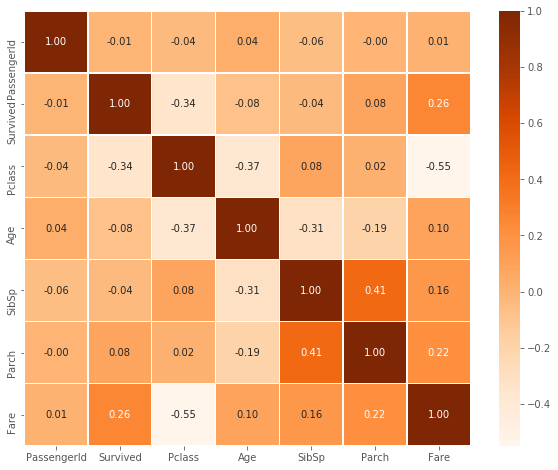

In [93]:
# 숫자형 변수들 간 상관관계 히트맵
plt.figure(figsize = (10,8))
sns.heatmap(data = titanic_df.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Oranges')
# >>> SibSp와 Parch의 상관계수는 0.41로 비교적 강한 양의 관계; 즉, 함께 탑승한 형제/배우자의 수와 부모/자식의 수는 서로 관련이 높음
# >>> Pclass와 Fare의 상관계수는 -0.55로 비교적 강한 음의 관계; 즉, 지위가 1등급에 가까울수록 지불 요금은 높았음을 유추 가능

In [94]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
titanic_df.isnull().sum() # 결측치 개수 찾기 >>> Age, Cabin, Embarked에서 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
titanic_df['Survived'].value_counts() # 0: dead, 1: survived

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Count Plot - Survival Rate')

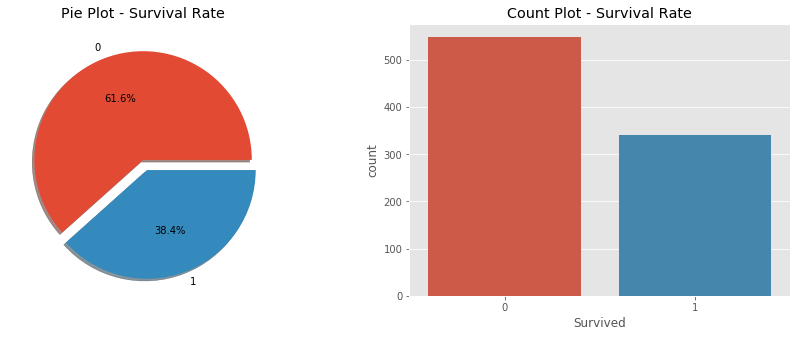

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
titanic_df['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie Plot - Survival Rate')
ax[0].set_ylabel('')
sns.countplot('Survived', data = titanic_df, ax = ax[1])
ax[1].set_title('Count Plot - Survival Rate')

## ◆ 결측치 처리

### 나이 (Age) --- 성별의 평균값으로 대체

In [98]:
titanic_df.Age.value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [99]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

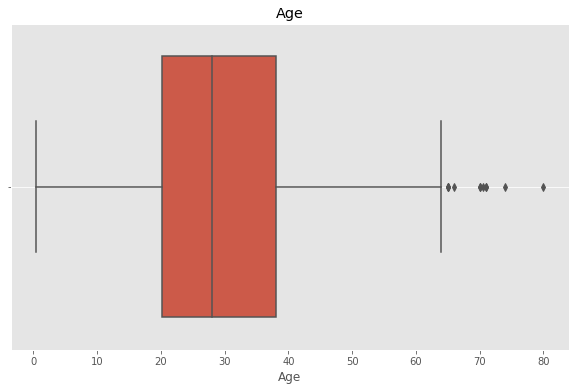

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(titanic_df['Age'])
plt.title('Age')
plt.grid()
# outliers는 처리 안함 (나이가 0 ~ 80세까지 분포하므로 적절한 데이터라고 판단)

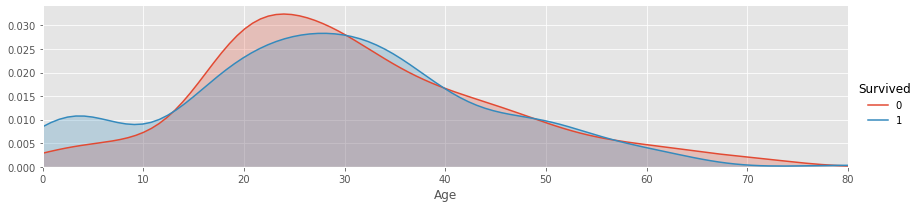

In [101]:
facet = sns.FacetGrid(titanic_df, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, titanic_df['Age'].max()))
facet.add_legend()

In [102]:
titanic_df['Age'].fillna(titanic_df.groupby('Sex')['Age'].transform('mean'), inplace=True) # 결측치는 성별의 평균으로 채워넣기

In [103]:
titanic_df['Age'].isnull().sum() 

0

In [104]:
titanic_df['Age'].describe()

count    891.000000
mean      29.736034
std       13.014897
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

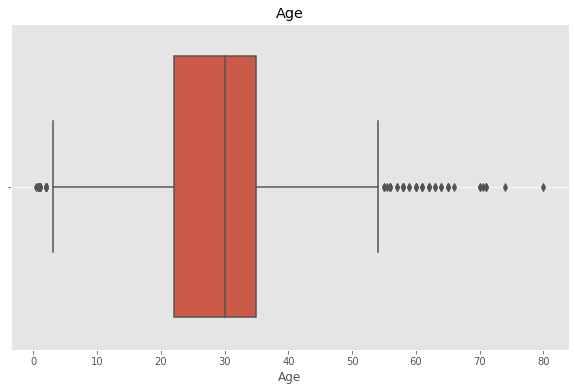

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(titanic_df['Age'])
plt.title('Age')
plt.grid()

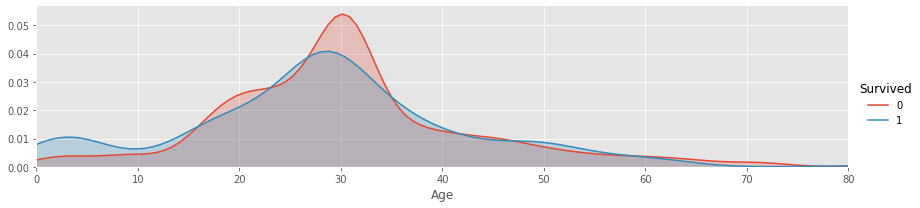

In [106]:
# 나이별 생존율 그래프 
facet = sns.FacetGrid(titanic_df, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, titanic_df['Age'].max()))
facet.add_legend()

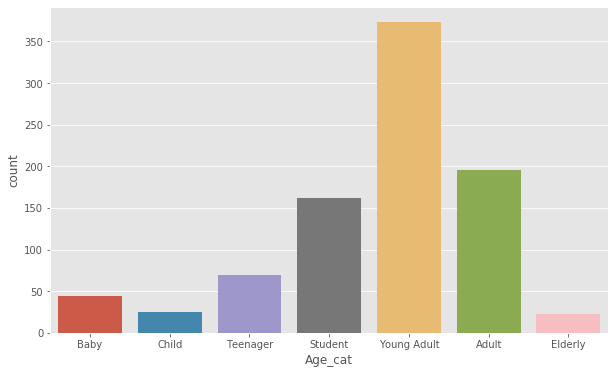

In [107]:
# 나이를 구간별로 나누어 Age_cat이라는 새로운 열 생성
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.countplot(x = 'Age_cat', data = titanic_df, order = group_names)
titanic_df.drop('Age', axis = 1, inplace = True)

In [108]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Young Adult


Text(0.5, 1.0, 'Survival Rate - Age & Sex')

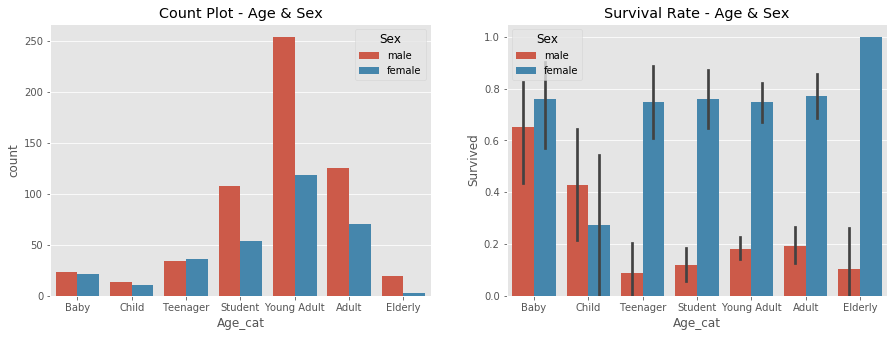

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'Age_cat', hue = 'Sex', data = titanic_df, order = group_names, ax = ax[0]) # 성별에 따른 나이별 탑승 현황 그래프
ax[0].set_title('Count Plot - Age & Sex')
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names, ax = ax[1]) # 성별에 따른 나이별 생존율 그래프 
ax[1].set_title('Survival Rate - Age & Sex')

In [110]:
titanic_df['Age_cat'] = titanic_df['Age_cat'].map({'Baby': 0, 'Child': 1, 'Teenager': 2, 'Student': 3, 'Young Adult': 4, 'Adult': 5, 'Elderly': 6}).astype(int)

In [111]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,4


### 캐빈 넘버 (Cabin) --- 변수 삭제

In [112]:
titanic_df['Cabin'].value_counts(dropna = False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C45              1
B86              1
B38              1
E58              1
D46              1
Name: Cabin, Length: 148, dtype: int64

In [113]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [114]:
titanic_df['Cabin'].isnull().sum() # 결측치가 많아 유용한 변수가 아니라고 판단

687

In [115]:
titanic_df2 = titanic_df.drop('Cabin', axis = 1) # Cabin 열 삭제

In [116]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,4


### 선착장 (Embarked) --- 결측치 행 삭제

In [117]:
titanic_df2['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [118]:
titanic_df2['Embarked'].isnull().sum()

2

Text(0.5, 1.0, 'Count Plot - Embarked')

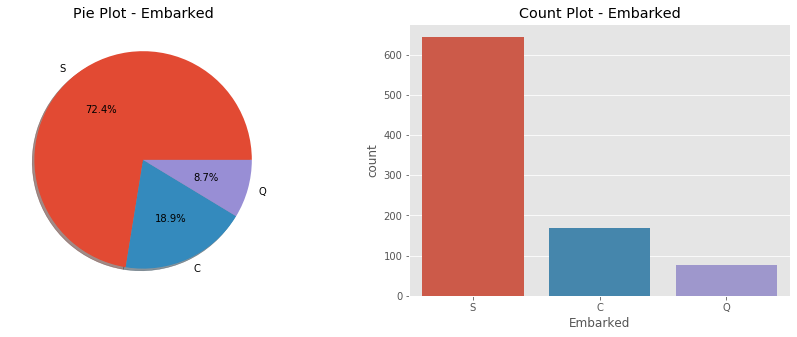

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
titanic_df2['Embarked'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie Plot - Embarked')
ax[0].set_ylabel('')
sns.countplot('Embarked', data = titanic_df2, ax = ax[1])
ax[1].set_title('Count Plot - Embarked')

In [120]:
titanic_df2 = titanic_df2.dropna(subset = ['Embarked']) # 결측치가 있는 행 제거

In [121]:
titanic_df2['Embarked'].isnull().sum()

0

In [122]:
titanic_df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_cat        0
dtype: int64

Text(0.5, 1.0, 'Survival Rate - Embarked')

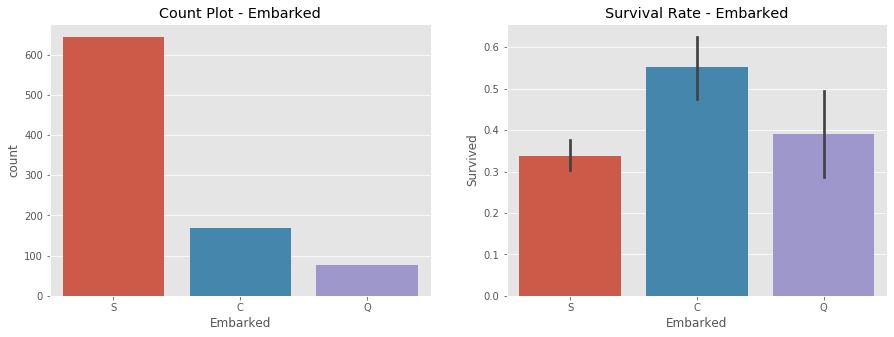

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('Embarked', data = titanic_df2, ax = ax[0]) # 선착장별 탑승 현황 그래프
ax[0].set_title('Count Plot - Embarked')
sns.barplot(x = 'Embarked', y = 'Survived', data = titanic_df2, ax = ax[1]) # 선착장별 생존율 그래프 
ax[1].set_title('Survival Rate - Embarked')

In [124]:
titanic_df2['Embarked'] = titanic_df2['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [125]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,0,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,4


## ◆ 이상치 처리

### 지위 (Pclass) --- 이상치 없음 

In [126]:
titanic_df2['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Count Plot - Pclass')

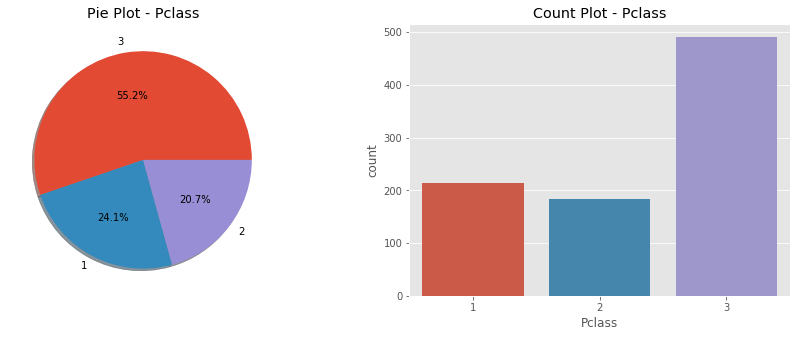

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
titanic_df2['Pclass'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie Plot - Pclass')
ax[0].set_ylabel('')
sns.countplot('Pclass', data = titanic_df2, ax = ax[1])
ax[1].set_title('Count Plot - Pclass')
# 그래프 색 맞추는 방법 ? 

Text(0.5, 1.0, 'Survival Rate - Pclass')

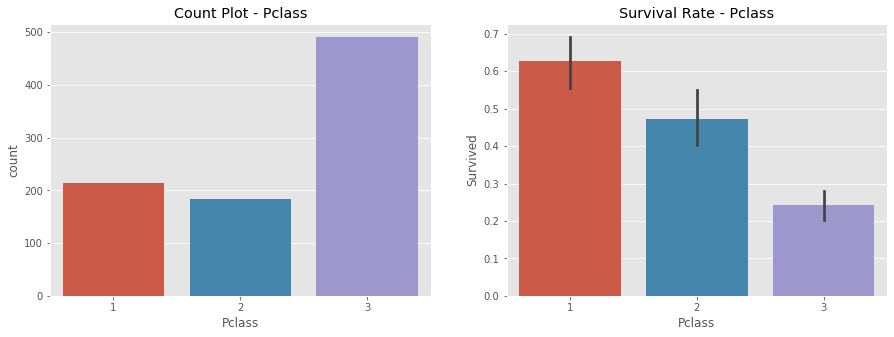

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('Pclass', data = titanic_df2, ax = ax[0]) # 지위별 탑승 현황 그래프
ax[0].set_title('Count Plot - Pclass')
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_df2, ax = ax[1]) # 지위별 생존율 그래프 
ax[1].set_title('Survival Rate - Pclass')

### 이름 (Name) --- 변수 제거

In [129]:
# 이름에서 prefix만 추출하기 --> 결혼 여부나 직업 추측 가능
titanic_df2['Prefix'] = titanic_df2['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [130]:
titanic_df2['Prefix'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Ms            1
Mme           1
Lady          1
Countess      1
Sir           1
Don           1
Capt          1
Name: Prefix, dtype: int64

In [131]:
titanic_df2['Prefix'].describe()

count     889
unique     17
top        Mr
freq      517
Name: Prefix, dtype: object

In [132]:
titanic_df2 = titanic_df2.drop('Name', axis = 1) # 정보가 유용하지 않다고 판단해 Name 열과 Prefix 열 삭제
titanic_df2 = titanic_df2.drop('Prefix', axis = 1) 

In [133]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,male,1,0,A/5 21171,7.2500,0,3
1,2,1,1,female,1,0,PC 17599,71.2833,1,5
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,0,4
3,4,1,1,female,1,0,113803,53.1000,0,4
4,5,0,3,male,0,0,373450,8.0500,0,4


### 성별 (Sex) --- 이상치 없음

In [134]:
titanic_df2['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Count Plot - Sex')

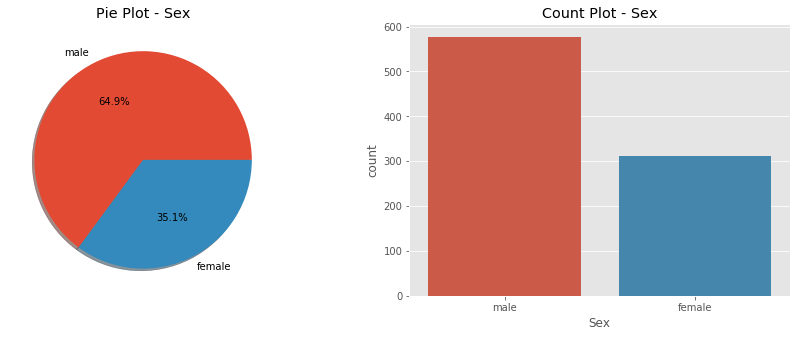

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
titanic_df2['Sex'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie Plot - Sex')
ax[0].set_ylabel('')
sns.countplot('Sex', data = titanic_df2, ax = ax[1])
ax[1].set_title('Count Plot - Sex')

Text(0.5, 1.0, 'Sex - Pclass')

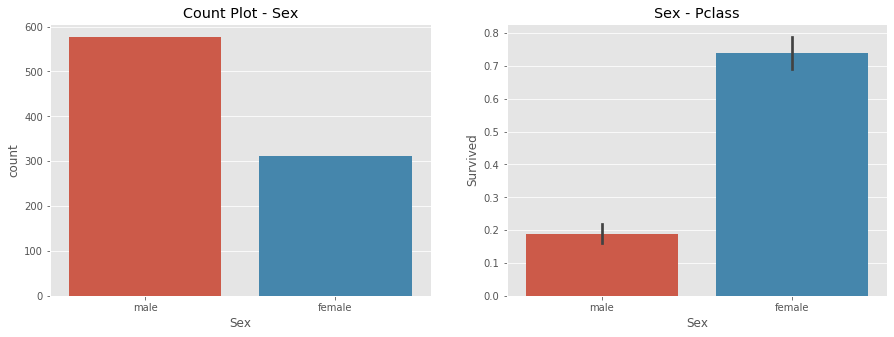

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('Sex', data = titanic_df2, ax = ax[0]) # 성별에 따른 탑승 현황 그래프
ax[0].set_title('Count Plot - Sex')
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df2, ax = ax[1]) # 성별에 따른 생존율 그래프 
ax[1].set_title('Sex - Pclass')

In [137]:
titanic_df2['Sex'] = titanic_df2['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

In [138]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,0,1,0,A/5 21171,7.2500,0,3
1,2,1,1,1,1,0,PC 17599,71.2833,1,5
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,0,4
3,4,1,1,1,1,0,113803,53.1000,0,4
4,5,0,3,0,0,0,373450,8.0500,0,4


### 가족 동반객 수 (SibSp, Parch) --- 변수 결합

In [139]:
titanic_df2['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [140]:
titanic_df2['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Count Plot - Parch')

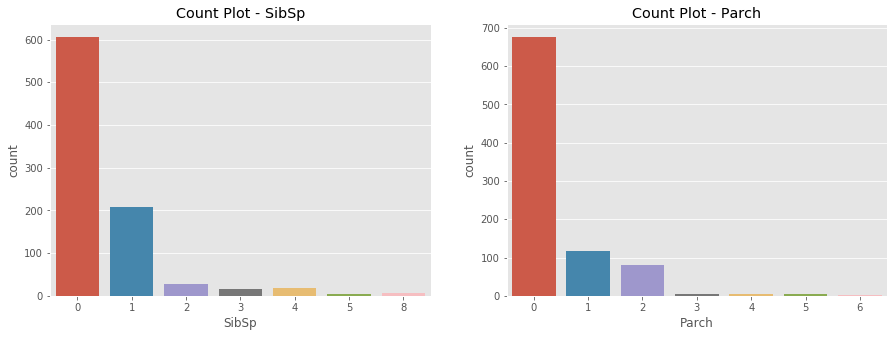

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('SibSp', data = titanic_df2, ax = ax[0]) # 동생/배우자 탑승 현황 그래프
ax[0].set_title('Count Plot - SibSp')
sns.countplot(x = 'Parch', data = titanic_df2, ax = ax[1]) # 부모/자식 탑승 현황 그래프 
ax[1].set_title('Count Plot - Parch')

In [142]:
# 히트맵 참고
titanic_df2['Family'] = titanic_df2['Parch'] + titanic_df2['SibSp'] # Parch 열과 SibSp 열을 합한 Family 열 생성
titanic_df2['Family'] = titanic_df2['Family'].astype(int)
titanic_df2 = titanic_df2.drop('SibSp', axis = 1) # 기존의 Parch와 SibSp는 제거
titanic_df2 = titanic_df2.drop('Parch', axis = 1) 

In [143]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Embarked,Age_cat,Family
0,1,0,3,0,A/5 21171,7.2500,0,3,1
1,2,1,1,1,PC 17599,71.2833,1,5,1
2,3,1,3,1,STON/O2. 3101282,7.9250,0,4,0
3,4,1,1,1,113803,53.1000,0,4,1
4,5,0,3,0,373450,8.0500,0,4,0


Text(0.5, 1.0, 'Survival Rate - Family')

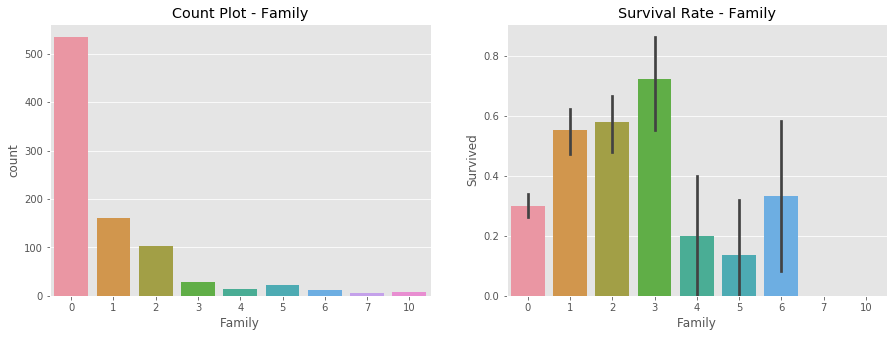

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('Family', data = titanic_df2, ax = ax[0]) # 선착장별 탑승 현황 그래프
ax[0].set_title('Count Plot - Family')
sns.barplot(x = 'Family', y = 'Survived', data = titanic_df2, ax = ax[1]) # 선착장별 생존율 그래프 
ax[1].set_title('Survival Rate - Family')

In [145]:
def get_category(family):
    cat = ''
    if family <= 0: cat = 0
    elif family <= 1: cat = 1
    elif family <= 2: cat = 2
    else: cat = 3
        
    return cat

plt.figure(figsize=(10, 6))

group_names = [0, 1, 2, 3]

titanic_df2['Family_cat'] = titanic_df2['Family'].apply(lambda x : get_category(x))
titanic_df2.drop('Family', axis = 1, inplace = True)

<Figure size 720x432 with 0 Axes>

In [146]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Embarked,Age_cat,Family_cat
0,1,0,3,0,A/5 21171,7.2500,0,3,1
1,2,1,1,1,PC 17599,71.2833,1,5,1
2,3,1,3,1,STON/O2. 3101282,7.9250,0,4,0
3,4,1,1,1,113803,53.1000,0,4,1
4,5,0,3,0,373450,8.0500,0,4,0


Text(0.5, 1.0, 'Survival Rate - Family_cat')

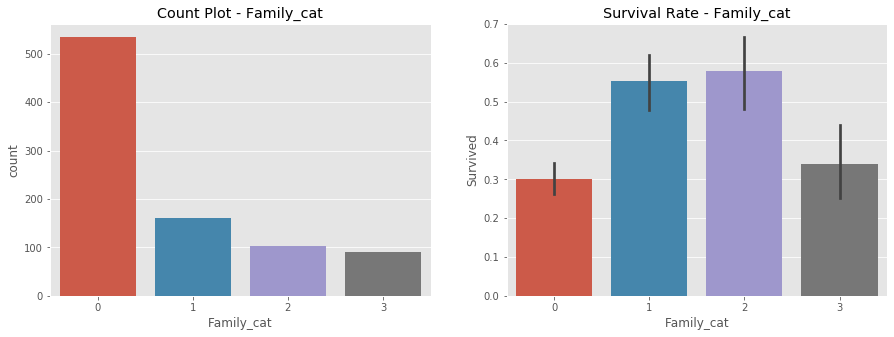

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'Family_cat', data = titanic_df2, order = group_names, ax = ax[0]) # 동반 가족수별 탑승 현황 그래프
ax[0].set_title('Count Plot - Family_cat')
sns.barplot(x = 'Family_cat', y = 'Survived', data = titanic_df2, order = group_names, ax = ax[1]) # 동반 가족수별 생존율 그래프 
ax[1].set_title('Survival Rate - Family_cat')

### 티켓 (Ticket) --- 변수 제거

In [148]:
titanic_df2['Ticket'].describe()

count        889
unique       680
top       347082
freq           7
Name: Ticket, dtype: object

In [149]:
titanic_df2['Ticket'].unique() # 종류가 너무 많아 유용한 변수가 될 수 없다고 판단

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

In [150]:
titanic_df2 = titanic_df2.drop('Ticket', axis = 1)

In [151]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Age_cat,Family_cat
0,1,0,3,0,7.2500,0,3,1
1,2,1,1,1,71.2833,1,5,1
2,3,1,3,1,7.9250,0,4,0
3,4,1,1,1,53.1000,0,4,1
4,5,0,3,0,8.0500,0,4,0


### 요금 (Fare)

In [152]:
titanic_df2['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [153]:
titanic_df2['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

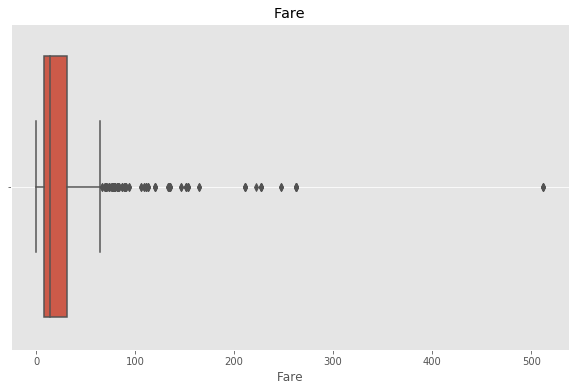

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(titanic_df2['Fare'])
plt.title('Fare')
plt.grid()

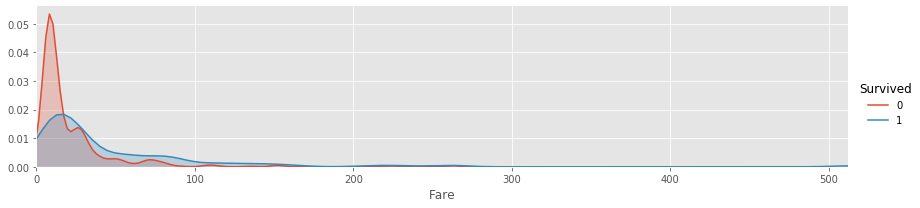

In [155]:
# 요금별 생존율 그래프
facet = sns.FacetGrid(titanic_df2, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, titanic_df2['Fare'].max()))
facet.add_legend()

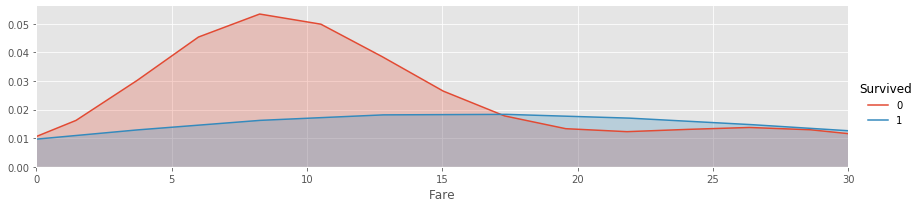

In [156]:
facet = sns.FacetGrid(titanic_df2, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, titanic_df2['Fare'].max()))
facet.add_legend()
plt.xlim(0,30) # 요금이 0 ~ 30 사이인 경우만 확대해서 보기
plt.style.use('ggplot')

In [157]:
# Fare 값이 100 이상인 행만 추출해서 보기 >>> Pclass가 모두 1등급이고 Embarked는 S 혹은 C임을 발견할 수 있음.
fare_over_100 = titanic_df2['Fare'] >= 100 
titanic_df_fare = titanic_df2[fare_over_100]
titanic_df_fare

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Age_cat,Family_cat
27,28,0,1,0,263.0000,0,3,3
31,32,1,1,1,146.5208,1,4,1
88,89,1,1,1,263.0000,0,3,3
118,119,0,1,0,247.5208,1,3,1
195,196,1,1,1,146.5208,1,5,0
215,216,1,1,1,113.2750,1,4,1
258,259,1,1,1,512.3292,1,4,0
268,269,1,1,1,153.4625,0,5,1
269,270,1,1,1,135.6333,0,4,0
297,298,0,1,1,151.5500,0,0,3


In [158]:
print("len(titanic_df_fare): {0}".format(len(titanic_df_fare)))

len(titanic_df_fare): 53


In [159]:
# Fare가 512.3292인 행만 추출해서 보기 >>> 3명(모두 생존) 나온걸로 봐서 잘못 입력된 값으로 보기는 힘듦. 이상치 처리하지 않기로 함.
fare_over_512 = titanic_df2['Fare'] >= 512.3292
titanic_df_fare2 = titanic_df2[fare_over_512]
titanic_df_fare2

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Age_cat,Family_cat
258,259,1,1,1,512.3292,1,4,0
679,680,1,1,0,512.3292,1,5,1
737,738,1,1,0,512.3292,1,4,0


In [160]:
titanic_df2['FareBand'] = pd.qcut(titanic_df['Fare'], 4)
titanic_df2[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [161]:
titanic_df2.loc[ titanic_df2['Fare'] <= 7.91, 'Fare'] = 0,
titanic_df2.loc[(titanic_df2['Fare'] > 7.91) & (titanic_df2['Fare'] <= 14.454), 'Fare'] = 1,
titanic_df2.loc[(titanic_df2['Fare'] > 14.454) & (titanic_df2['Fare'] <= 31), 'Fare'] = 2,
titanic_df2.loc[ titanic_df2['Fare'] > 31, 'Fare'] = 3
#dataset['Fare'] = dataset['Fare'].astype(int)

titanic_df2['Fare_cat'] = titanic_df2['Fare']
titanic_df2 = titanic_df2.drop(['FareBand'], axis = 1)
titanic_df2 = titanic_df2.drop(['Fare'], axis = 1)

In [162]:
titanic_df2.head(10)

,PassengerId,Survived,Pclass,Sex,Embarked,Age_cat,Family_cat,Fare_cat
0,1,0,3,0,0,3,1,0.0
1,2,1,1,1,1,5,1,3.0
2,3,1,3,1,0,4,0,1.0
3,4,1,1,1,0,4,1,3.0
4,5,0,3,0,0,4,0,1.0
5,6,0,3,0,2,4,0,1.0
6,7,0,1,0,0,5,0,3.0
7,8,0,3,0,0,0,3,2.0
8,9,1,3,1,0,4,2,1.0
9,10,1,2,1,1,2,1,2.0


Text(0.5, 1.0, 'Survival Rate - Fare_cat')

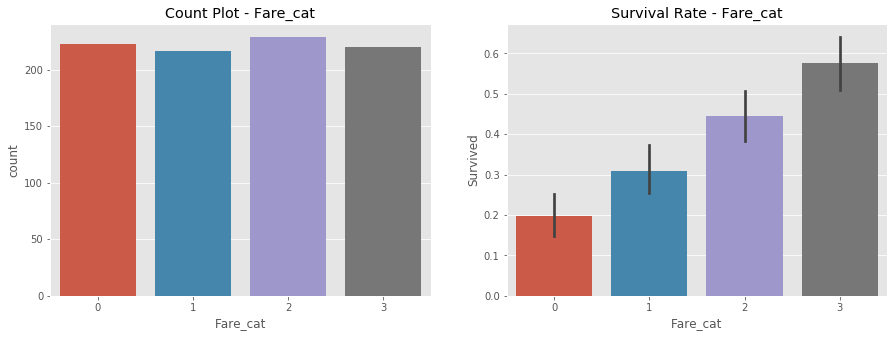

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'Fare_cat', data = titanic_df2, order = group_names, ax = ax[0]) # 요금별 현황 그래프
ax[0].set_title('Count Plot - Fare_cat')
sns.barplot(x = 'Fare_cat', y = 'Survived', data = titanic_df2, order = group_names, ax = ax[1]) # 요금별 생존율 그래프
ax[1].set_title('Survival Rate - Fare_cat')

In [164]:
titanic_df2 = titanic_df2.drop('PassengerId', axis = 1)

In [165]:
titanic_df2.head(5)

,Survived,Pclass,Sex,Embarked,Age_cat,Family_cat,Fare_cat
0,0,3,0,0,3,1,0.0
1,1,1,1,1,5,1,3.0
2,1,3,1,0,4,0,1.0
3,1,1,1,0,4,1,3.0
4,0,3,0,0,4,0,1.0


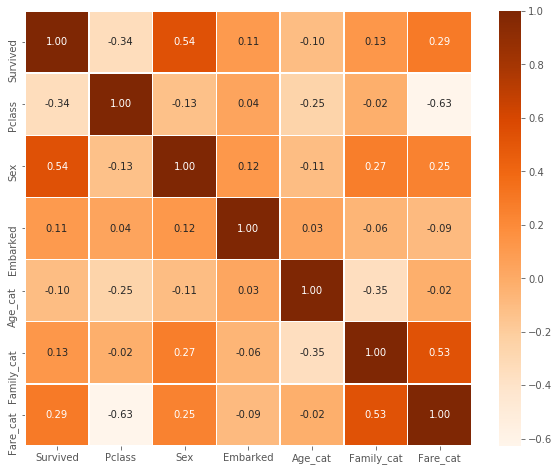

In [166]:
plt.figure(figsize = (10,8))
sns.heatmap(data = titanic_df2.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Oranges')

## 데이터 분할 및 정규화

In [193]:
y_titanic_df = titanic_df2['Survived']
X_titanic_df = titanic_df2.drop('Survived', axis = 1)

In [194]:
# partitioning: 학습용 데이터셋 (training set)과 평가용 데이터셋 (test set)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, random_state = 1, test_size = 0.2) 
# train:test의 비율을 8:2으로 지정

In [195]:
scaler = StandardScaler() # Standard Scaler로 표준화하기 >>> 평균 0, 분산 1로 변환
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
X_train # 제대로 스케일링이 되었는지 확인

array([[ 0.81095497, -0.72508694, -0.57163833,  0.26650243, -0.71235167,
        -0.41837076],
       [ 0.81095497, -0.72508694, -0.57163833, -0.4944744 , -0.71235167,
        -0.41837076],
       [ 0.81095497, -0.72508694,  2.53091779,  0.26650243, -0.71235167,
        -1.31164888],
       ...,
       [ 0.81095497, -0.72508694,  0.97963973,  0.26650243,  0.27880692,
         0.47490735],
       [-0.39529813, -0.72508694, -0.57163833,  1.02747926,  0.27880692,
         0.47490735],
       [ 0.81095497, -0.72508694, -0.57163833, -0.4944744 , -0.71235167,
        -0.41837076]])

## 평가

In [197]:
# 의사결정나무 기법으로 test set 예측하기
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy : {0:.4f}, Precision : {1:.4f}, Recall : {2:.4f}'.format(accuracy, precision, recall))

In [198]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[97  8]
 [27 46]]
Accuracy : 0.8034, Precision : 0.8519, Recall : 0.6301


In [192]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]}

dt_clf = DecisionTreeClassifier(random_state = 11)
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8030
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8258
